# Lasso and Ridge Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
dataset = pd.read_csv('/kaggle/input/openintro-possum/possum.csv')
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


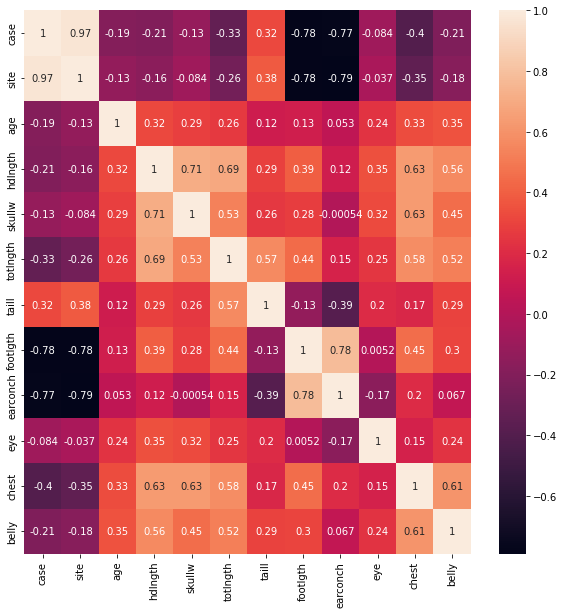

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [5]:
dataset.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

**Missing Value Treatment**

In [6]:
dataset['age'] = dataset['age'].fillna(dataset.age.mean())
dataset.age.isnull().sum()

0

In [7]:
dataset['footlgth'] = dataset['footlgth'].fillna(dataset.footlgth.mean())
dataset.footlgth.isnull().sum()

0

In [8]:
dataset.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

**Remove columns that are not needed for further analysis**

In [9]:
dataset.drop(labels=['Pop', 'sex'] , axis=1 , inplace=True)

In [10]:
X = dataset.drop(labels=['totlngth'], axis=1)
y = dataset['totlngth']

In [11]:
X.shape

(104, 11)

In [12]:
y.shape

(104,)

In [13]:
X

,case,site,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
0,1,1,8.0,94.1,60.4,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,6.0,92.5,57.6,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,6.0,94.0,60.0,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,6.0,93.2,57.1,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,2.0,91.5,56.3,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1.0,89.5,56.0,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1.0,88.6,54.7,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,6.0,92.4,55.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,4.0,91.5,55.2,36.5,62.9,45.9,15.4,25.0,29.0


In [14]:
y

0      89.0
1      91.5
2      95.5
3      92.0
4      85.5
       ... 
99     81.5
100    82.5
101    89.0
102    82.5
103    89.0
Name: totlngth, Length: 104, dtype: float64

**Split the dataset**

In [15]:
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size =0.2 , random_state=0)

**Feature Scaling**

In [16]:
scalar = StandardScaler()
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

**Linear Regression**

In [17]:
linear = LinearRegression()
linear.fit(X_train_scalar, y_train)

LinearRegression()

In [18]:
y_pred_scalar = linear.predict(X_test_scalar)

In [19]:
print(f'Score: {round(linear.score(X_test_scalar,y_test),4)}\n')
print(f'Coefficients: { linear.coef_}\n')
print(f'mean_absolute_error: {metrics.mean_absolute_error(y_pred_scalar, y_test)}\n')
print(f'R square Error: {metrics.r2_score(y_pred_scalar, y_test)}\n')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_pred_scalar, y_test)}\n')

Score: 0.7013

Coefficients: [-2.00474346  0.48328624 -0.21572193  1.61039087  0.33934846  2.28836246
  0.67797139 -0.41915567 -0.21765964 -0.12681713  0.16102906]

mean_absolute_error: 1.9576030227269556

R square Error: 0.402282779144549

Mean Squared Error: 6.155944476941621



**Lasso with GridSearchCV**

In [20]:
lasso_grid = Lasso()
parameters = {
    'alpha': [0.1 , 0.2, 0.01, 0.001, 0.3]
}
grid = GridSearchCV(lasso_grid, param_grid=parameters, cv=10, scoring = 'neg_mean_squared_error')
grid.fit(X_train_scalar, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.01, 0.001, 0.3]},
             scoring='neg_mean_squared_error')

In [21]:
grid.best_params_ , grid.best_score_

({'alpha': 0.1}, -4.751105561668381)

In [22]:
original_lasso = Lasso(alpha=0.1)
original_lasso.fit(X_train_scalar, y_train)

Lasso(alpha=0.1)

In [23]:
y_pred_lasso = original_lasso.predict(X_test_scalar)

In [24]:
print(f'Score: {round(original_lasso.score(X_test_scalar,y_test),4)}\n')
print(f'Coefficients: { original_lasso.coef_}\n')
print(f'mean_absolute_error: {metrics.mean_absolute_error(y_pred_lasso, y_test)}\n')
print(f'R square Error: {metrics.r2_score(y_pred_lasso, y_test)}\n')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_pred_lasso, y_test)}\n')

Score: 0.6871

Coefficients: [-1.09736078 -0.         -0.015026    1.53469085  0.19063132  2.21841141
  0.58153101 -0.         -0.          0.          0.09707781]

mean_absolute_error: 2.0152183582191414

R square Error: 0.2573948455527032

Mean Squared Error: 6.447898706926726



**Ridge With GridSearchCV**

In [25]:
ridge_grid = Ridge()

parameters = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0 , 20.0, 30.0, 40.0]
}

grid = GridSearchCV(ridge_grid , cv=10, param_grid=parameters, scoring='neg_mean_squared_error')
grid.fit(X_train_scalar, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 30.0,
                                   40.0]},
             scoring='neg_mean_squared_error')

In [26]:
grid.best_params_ , grid.best_score_

({'alpha': 10.0}, -4.952863328022465)

In [27]:
original_ridge = Ridge(alpha=10)
original_ridge.fit(X_train_scalar, y_train)

Ridge(alpha=10)

In [28]:
y_pred_ridge = original_ridge.predict(X_test_scalar)

In [29]:
print(f'Score: {round(original_ridge.score(X_test_scalar,y_test),4)}\n')
print(f'Coefficients: { original_ridge.coef_}\n')
print(f'mean_absolute_error: {metrics.mean_absolute_error(y_pred_ridge, y_test)}\n')
print(f'R square Error: {metrics.r2_score(y_pred_ridge, y_test)}\n')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_pred_ridge, y_test)}\n')

Score: 0.6607

Coefficients: [-0.78146428 -0.27305854 -0.1413822   1.30938903  0.34468446  2.00380562
  0.69432275 -0.16905323 -0.02134366  0.10893371  0.26756224]

mean_absolute_error: 2.1532132779653517

R square Error: 0.2254533327308541

Mean Squared Error: 6.991721183137279

